In [14]:
# Importing modules
import pandas as pd
import networkx as nx     
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [18]:
# Import data
book1 = pd.read_csv(r"C:\Users\shaqa\OneDrive\Desktop/datasets/book1.csv")
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [20]:
#Return the empty graph with n nodes and zero edges.
G_book1 = nx.Graph()

In [21]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

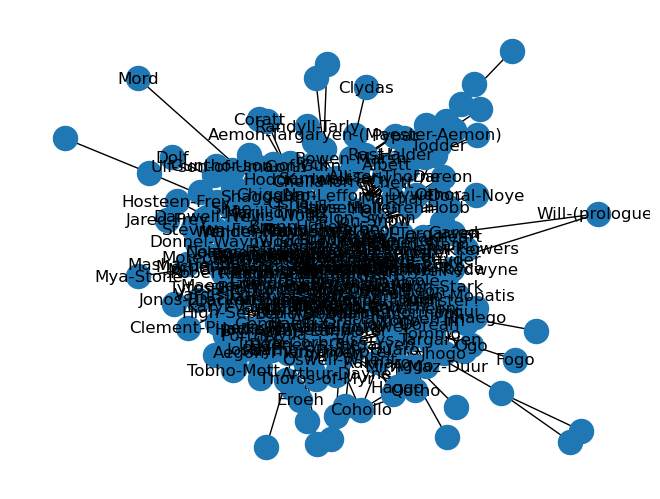

In [34]:
pos = nx.draw_kamada_kawai(G_book1, with_labels=True)

nx.draw(G_book1, pos=pos)

In [23]:
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

## 4. The most important character in Game of Thrones

In [24]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0])

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4])

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1[:10])
print(sorted_deg_cen_book5[:10])

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


## 5. The evolution of character importance

<AxesSubplot:>

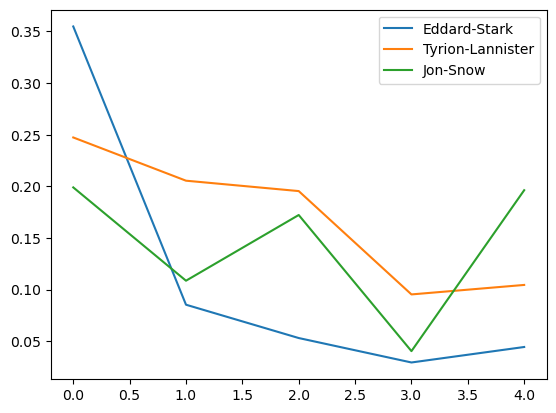

In [27]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records (evol)
#degree_evol_df = degree_evol_df1.loc[:,~degree_evol_df1.columns.duplicated()].copy()
# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

## 6. What's up with Stannis Baratheon?

<AxesSubplot:>

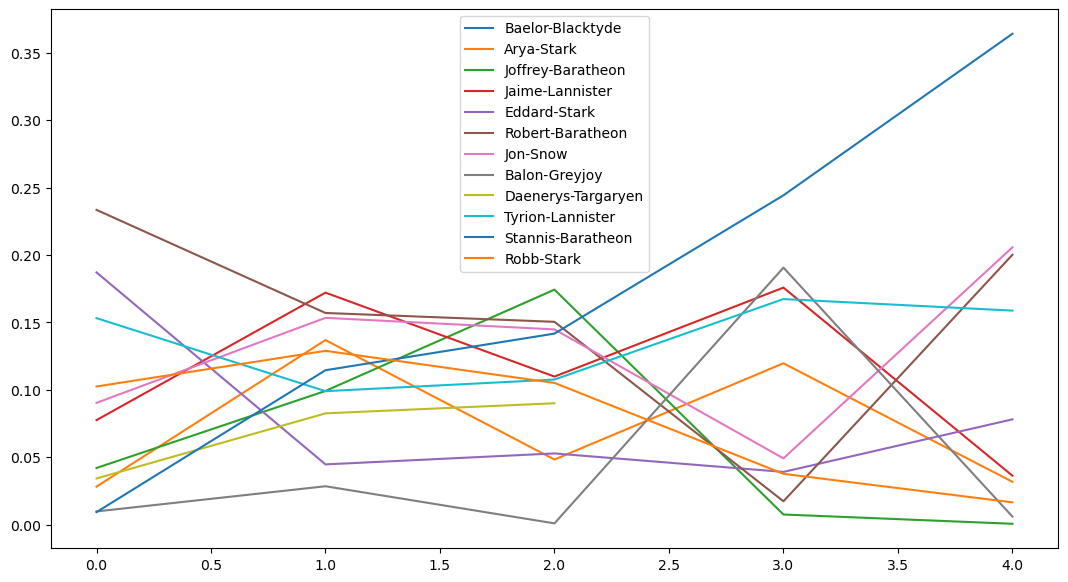

In [29]:
# Creating a list of betweenness centrality of all the books just like we did for degree centrality
evol = [nx.betweenness_centrality(book ,weight='weight') for book in books]

# Making a DataFrame from the list
betweenness_evol_df = pd.DataFrame.from_records (evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the evolution of the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

## 7. What does Google PageRank tell us about GoT?

<AxesSubplot:>

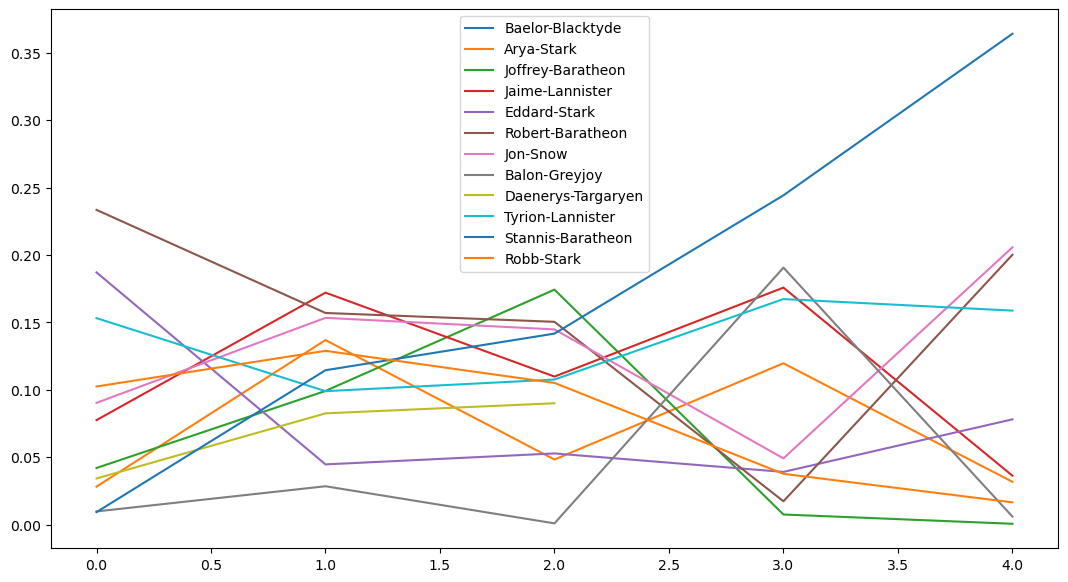

In [30]:
# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records (evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
betweenness_evol_df[list_of_char].plot(figsize=(13, 7))

## 8. Correlation between different measures

In [56]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1,2
0,1.000000,0.793372,0.971493
1,0.793372,1.000000,0.833816
2,0.971493,0.833816,1.000000


## 9. Focus on just one book 

In [44]:
degree_map = books[0].degree
degree_dict = dict(degree_map)
sort_degree_dict = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

In [46]:
sort_degree_dict[:10]

[('Eddard-Stark', 66),
 ('Robert-Baratheon', 50),
 ('Tyrion-Lannister', 46),
 ('Catelyn-Stark', 43),
 ('Jon-Snow', 37),
 ('Robb-Stark', 35),
 ('Sansa-Stark', 35),
 ('Bran-Stark', 32),
 ('Cersei-Lannister', 30),
 ('Joffrey-Baratheon', 30)]

In [47]:
degree_map = books[0].degree(weight="weight")
degree_dict = dict(degree_map)
sort_degree_dict = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

In [48]:
sort_degree_dict[:10]

[('Eddard-Stark', 1284),
 ('Robert-Baratheon', 941),
 ('Jon-Snow', 784),
 ('Tyrion-Lannister', 650),
 ('Sansa-Stark', 545),
 ('Bran-Stark', 531),
 ('Catelyn-Stark', 520),
 ('Robb-Stark', 516),
 ('Daenerys-Targaryen', 443),
 ('Arya-Stark', 430)]

In [51]:
eigen_vector = nx.eigenvector_centrality(books[0])
sort_eigen_vector = sorted(eigen_vector.items(), key=lambda x: x[1], reverse=True)

In [52]:
sort_eigen_vector[:10]

[('Eddard-Stark', 0.29640893871843443),
 ('Robert-Baratheon', 0.2694880017758137),
 ('Sansa-Stark', 0.23155019835665283),
 ('Tyrion-Lannister', 0.22520388145217876),
 ('Joffrey-Baratheon', 0.22075394589376895),
 ('Cersei-Lannister', 0.21643331139694155),
 ('Catelyn-Stark', 0.21255000233989124),
 ('Petyr-Baelish', 0.201464044325535),
 ('Jaime-Lannister', 0.1949579857603636),
 ('Bran-Stark', 0.19377206822851203)]

In [54]:
betweenes = nx.betweenness_centrality(books[0])
sort_bet = sorted(betweenes.items(), key=lambda x: x[1], reverse=True)

In [55]:
sort_bet[:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

Overall, Ned’s importance stands out by a wide margin. The strong performance by Ned and Robert reflects the main narrative of the book. All other action is a direct or indirect consequence of Ned’s decision to leave Winterfell to serve as the Hand of the King.